<a href="https://colab.research.google.com/github/Krahjotdaan/EMNISTHandwritedCharacters/blob/main/EMNISTHandwritedCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import Sequential
from sklearn.model_selection import train_test_split

In [39]:
train = pd.read_csv('emnist-balanced-train.csv', header=None)
test = pd.read_csv('emnist-balanced-test.csv', header=None)

In [41]:
train.shape, test.shape

((112800, 785), (18800, 785))

In [42]:
labels = {
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [43]:
train = train[train[0].isin(np.arange(10, 36))] # only capital letters

In [68]:
train[0].describe()

count    62400.00000
mean        22.50000
std          7.50006
min         10.00000
25%         16.00000
50%         22.50000
75%         29.00000
max         35.00000
Name: 0, dtype: float64

In [44]:
train.reset_index(inplace=True)
train

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62395,112793,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62396,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62397,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62398,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_train = train.loc[:, 1:]
y_train = train.loc[:, 0]

X_train.shape, y_train.shape

((62400, 784), (62400,))

# Reshaping

In [46]:
def flip_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [47]:
X_train = np.apply_along_axis(flip_and_rotate, 1, X_train.values)
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(62400, 28, 28, 1)

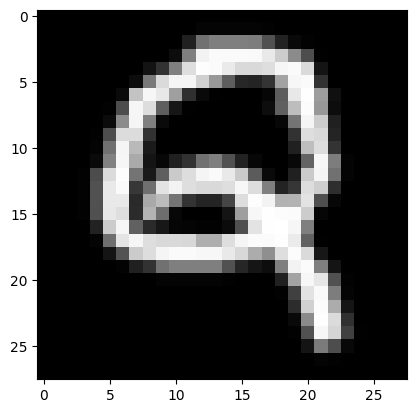

In [48]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [56]:
X_train = X_train.astype('float32') / 255

In [65]:
y_train.nunique()

26

In [70]:
y_train = k.utils.to_categorical(y_train, 36)
y_train.shape

(62400, 36)

# Model

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train,  y_train, test_size=0.1, random_state=42)

In [92]:
model = Sequential()

model.add(Conv2D(4, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(180, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(180, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(36, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 28, 28, 4)         40        
                                                                 
 conv2d_59 (Conv2D)          (None, 28, 28, 4)         148       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 4)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 4)         16        
 chNormalization)                                                
                                                                 
 conv2d_60 (Conv2D)          (None, 14, 14, 8)         296       
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 8)        

In [93]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1872/1872 [==============================] - 64s 33ms/step - loss: 1.7739 - accuracy: 0.4771 - val_loss: 0.4311 - val_accuracy: 0.8670
Epoch 2/5
1872/1872 [==============================] - 65s 35ms/step - loss: 0.8627 - accuracy: 0.7312 - val_loss: 0.3028 - val_accuracy: 0.9018
Epoch 3/5
1872/1872 [==============================] - 58s 31ms/step - loss: 0.6929 - accuracy: 0.7848 - val_loss: 0.2829 - val_accuracy: 0.9104
Epoch 4/5
1872/1872 [==============================] - 58s 31ms/step - loss: 0.6174 - accuracy: 0.8097 - val_loss: 0.2519 - val_accuracy: 0.9247
Epoch 5/5
1872/1872 [==============================] - 60s 32ms/step - loss: 0.5655 - accuracy: 0.8251 - val_loss: 0.2398 - val_accuracy: 0.9264


In [94]:
history = model.fit(x=X_train, y=y_train, batch_size=30, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1872/1872 [==============================] - 62s 33ms/step - loss: 0.5310 - accuracy: 0.8389 - val_loss: 0.2308 - val_accuracy: 0.9272
Epoch 2/5
1872/1872 [==============================] - 59s 32ms/step - loss: 0.5023 - accuracy: 0.8481 - val_loss: 0.2034 - val_accuracy: 0.9346
Epoch 3/5
1872/1872 [==============================] - 57s 31ms/step - loss: 0.4755 - accuracy: 0.8544 - val_loss: 0.2161 - val_accuracy: 0.9329
Epoch 4/5
1872/1872 [==============================] - 58s 31ms/step - loss: 0.4582 - accuracy: 0.8615 - val_loss: 0.1989 - val_accuracy: 0.9317
Epoch 5/5
1872/1872 [==============================] - 59s 31ms/step - loss: 0.4419 - accuracy: 0.8666 - val_loss: 0.2033 - val_accuracy: 0.9361


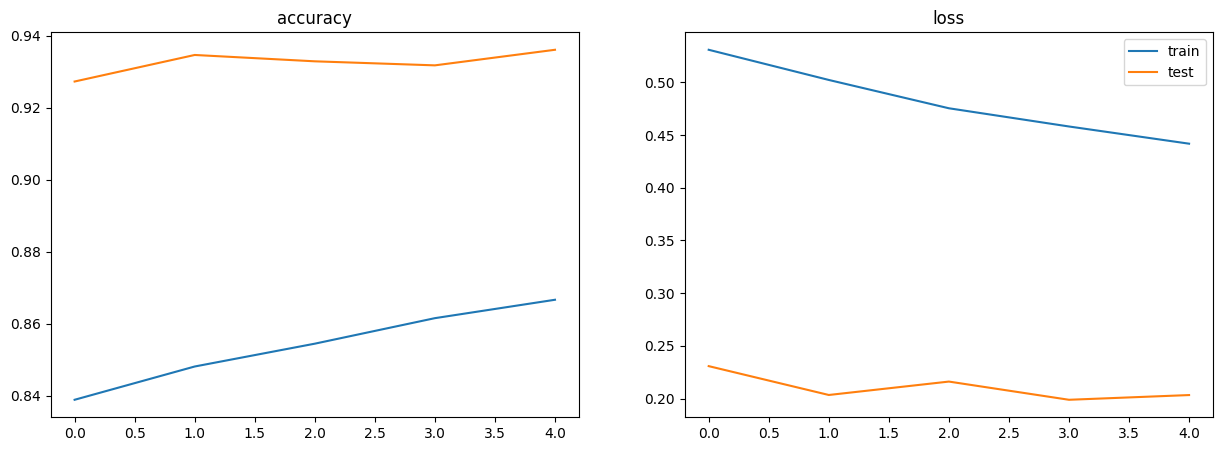

In [95]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

axes[0].plot(history.history['accuracy'], label='train')
axes[0].plot(history.history['val_accuracy'], label='test')
axes[0].set_title('accuracy')

axes[1].plot(history.history['loss'], label='train')
axes[1].plot(history.history['val_loss'], label='test')
axes[1].set_title('loss')

plt.legend()
plt.show()